<a href="https://colab.research.google.com/github/wagnermoraesjr/Etapa_Feature_Selection/blob/main/Notebook_Feature_Selection_Problema_Churn_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Feature Selection (Seleção de Variáveis)**

O processo de Feature Selection consiste na escolha das variáveis mais relevantes para prever a variável alvo, descartando aquelas que contribuem pouco ou até mesmo introduzem ruído desnecessário. Essa prática é fundamental para otimizar o desempenho dos modelos, reduzindo a complexidade e melhorando a interpretabilidade. Ao selecionar as features mais informativas, o modelo se torna mais preciso, eficiente e resistente a overfitting, especialmente em conjuntos de dados extensos. Além disso, contribui para a economia computacional, uma vez que menos variáveis resultam em menor carga de processamento. Dessa forma, o feature selection desempenha um papel estratégico na criação de modelos de machine learning robustos e eficazes.<br><br>


**Objetivo**

Meu objetivo aqui é colocar em prática o aprendizado sobre o processo de seleção de variáveis, para uma escolha mais estratégica, e orientada a dados, de quais variáveis iremos utilizar no treinamento dos nossos modelos de Machine Learning. Existem diversar técnicas de seleção de variáveis e iremos abordar algumas delas aqui neste projeto. **Importante ressaltar que nossa ABT possui Target, porém para exemplificar métodos Não Supervisionados, iremos retirar o Target por um momento, para trabalharmos com esses métodos.**<br><br>

**Ferramentas**

Nesse caso, como já tenho a minha ABT pronta e tratada, já em formado CSV, vou trabalhar principalmente com o **Python** e a biblioteca **pandas**. Também irei utilizar outras bibliotecas para me auxiliar no processo como a **matplotlib** para plotagem de gráficos, a **scikit-learn** para tratamento e a **pickle** para serializar e desserializar objetos Python.<br><br>

**Problema de Negócio**

Para esse trabalho vou usar dados fictícios que simulam as operações de uma empresa que gostaria de avaliar a perda de clientes (Churn).<br><br>

**Base de Dados**

- **ABT de Churn:** Base com informações cadastrais de 1.000 pessoas, já consolidada com as variáveis explicativas criadas e já preparada na etapa anterior. O arquivo está em formato CSV.

<br>

##**Importação das bibliotecas necessárias**

In [ ]:
# Importando as bibliotecas Pandas e Numpy.
import pandas as pd
import numpy as np

# Importando a biblioteca Matplotlib para plotarmos gráficos que ajudarão no entendimento do assunto.
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Importando os métodos 'VarianceThreshold' e 'RFE' da biblioteca Scikit-Learn.
from sklearn.feature_selection import VarianceThreshold, RFE

# Importando o método 'PCA' da biblioteca Scikit-Learn.
from sklearn.decomposition import PCA

# Importando os algoritmos 'RandomForestClassifier' e 'DecisionTreeClassifier' da biblioteca Scikit-Learn.
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Importanto o pickle para serialização.
import pickle

<br>

## **Leitura e visualização da nossa ABT (treino)**

In [ ]:
# Lendo arquivo CSV.
abt_churn_00 = pd.read_csv('/content/drive/MyDrive/abt_churn_tratada.csv')

abt_churn_00.shape

(700, 94)

In [ ]:
abt_churn_00.head()

,Unnamed: 0,IDADE,QT_DIAS_DESDE_INSCR,FL_USOU_SUPORTE,UTL_DATA_COMPRA,DIAS_DESDE_ULT_TRANS,QTD_DIAS_DESDE_PRIM_COMPRA,QTD_COMPRAS_MES,VL_TOT_GASTO,VL_MED_GASTO,...,VL_RAZ_MED_U9M_U12M_CONS_ROU,PLANO_Básico,PLANO_Intermediário,CATEG_FAVORITA_Eletrônicos,CATEG_FAVORITA_Esportes,CATEG_FAVORITA_Livros,CATEG_FAVORITA_Roupas,NM_GENERO_M,ID_CLIENTE,CHURN
0,541,1.583371,0.135225,-1.049811,-1.323513,0.723643,-2.386224,-1.299335,-1.245930,2.150143,...,-1.681573e-15,-0.699544,1.367060,1.898753,-0.524448,-0.531085,-0.431788,-1.017292,542,0
1,440,0.785320,1.646397,0.952553,-1.185050,0.588833,0.029952,0.243120,-0.060821,-0.875874,...,-6.930967e-02,-0.699544,1.367060,-0.526661,-0.524448,-0.531085,-0.431788,-1.017292,441,0
2,482,1.250849,1.537903,0.952553,1.191907,-0.797010,0.749980,1.699884,0.808657,-1.045152,...,-1.681573e-15,1.429503,-0.731497,-0.526661,1.906767,-0.531085,-0.431788,-1.017292,483,0
3,422,1.317354,1.477843,-1.049811,-1.219666,0.621187,-2.159824,-0.699491,-1.030785,0.194473,...,-6.930967e-02,-0.699544,1.367060,1.898753,-0.524448,-0.531085,-0.431788,0.983002,423,1
4,778,-0.212243,-0.891597,-1.049811,0.534205,-0.478859,0.052221,-1.127951,-1.144778,-0.535567,...,-6.930967e-02,-0.699544,-0.731497,-0.526661,-0.524448,1.882938,-0.431788,-1.017292,779,1


In [ ]:
# Dropando a coluna ID (pois não será necessária na etapa de modelagem).
abt_churn_00.drop(axis=1,columns=['Unnamed: 0','ID_CLIENTE'],inplace=True)

abt_churn_00.shape

(700, 92)

In [ ]:
abt_churn_00.head()

,IDADE,QT_DIAS_DESDE_INSCR,FL_USOU_SUPORTE,UTL_DATA_COMPRA,DIAS_DESDE_ULT_TRANS,QTD_DIAS_DESDE_PRIM_COMPRA,QTD_COMPRAS_MES,VL_TOT_GASTO,VL_MED_GASTO,VL_MAX_GASTO,...,VL_RAZ_MED_U6M_U9M_CONS_ROU,VL_RAZ_MED_U9M_U12M_CONS_ROU,PLANO_Básico,PLANO_Intermediário,CATEG_FAVORITA_Eletrônicos,CATEG_FAVORITA_Esportes,CATEG_FAVORITA_Livros,CATEG_FAVORITA_Roupas,NM_GENERO_M,CHURN
0,1.583371,0.135225,-1.049811,-1.323513,0.723643,-2.386224,-1.299335,-1.245930,2.150143,-0.548968,...,-1.118994e-15,-1.681573e-15,-0.699544,1.367060,1.898753,-0.524448,-0.531085,-0.431788,-1.017292,0
1,0.785320,1.646397,0.952553,-1.185050,0.588833,0.029952,0.243120,-0.060821,-0.875874,0.515401,...,7.698724e-02,-6.930967e-02,-0.699544,1.367060,-0.526661,-0.524448,-0.531085,-0.431788,-1.017292,0
2,1.250849,1.537903,0.952553,1.191907,-0.797010,0.749980,1.699884,0.808657,-1.045152,0.037201,...,-1.118994e-15,-1.681573e-15,1.429503,-0.731497,-0.526661,1.906767,-0.531085,-0.431788,-1.017292,0
3,1.317354,1.477843,-1.049811,-1.219666,0.621187,-2.159824,-0.699491,-1.030785,0.194473,-1.064490,...,7.698724e-02,-6.930967e-02,-0.699544,1.367060,1.898753,-0.524448,-0.531085,-0.431788,0.983002,1
4,-0.212243,-0.891597,-1.049811,0.534205,-0.478859,0.052221,-1.127951,-1.144778,-0.535567,0.468414,...,-1.118994e-15,-6.930967e-02,-0.699544,-0.731497,-0.526661,-0.524448,1.882938,-0.431788,-1.017292,1


<br>

## **Métodos de Seleção de Variáveis**

### **Eliminação de Features por % de Valores Nulos (Missings)**

Variáveis com alta porcentagem de valores nulos não são úteis para o treinamento do modelo, então podemos eliminar variáveis com mais de 80% de valores nulos, por exemplo.

**Como esse método já foi realizado na etapa de DataPrep, não será necessário fazer novamente.**

<br>

### **Seleção de Variáveis por Variância**

Variáveis com baixa variância não contêm muita informação e, portanto, podem ser removidas do conjunto de dados sem muito prejuízo para a qualidade do modelo de aprendizado de máquina.

In [ ]:
# Fazendo um cópia do DataFrame.
abt_churn_01 = abt_churn_00.copy()

# Definindo o limiar (queremos manter as variáveis que têm uma variância superior ao valor definido). Se colocar valor 0 (zero) apenas variáveis constantes serão descartadas. Neste caso para fins de estudos iremos definir o limiar como 0.3.
threshold = 0.3

# Criando uma instância do seletor de características com o limiar específicado.
selector = VarianceThreshold(threshold)

# Ajustando o seletor ao conjunto de dados abt_churn_01 para identificar características com baixa variância.
selector.fit_transform(abt_churn_01)

# Colunas selecionadas.
selected_features = abt_churn_01.columns[selector.get_support()]
discarded_features = abt_churn_01.columns[~selector.get_support()]
print('Variáveis que serão deletadas: ', discarded_features)

# Mantendo somente as variáveis selecionadas na ABT.
abt_churn_01 = abt_churn_01[selected_features]

abt_churn_01.shape

Variáveis que serão deletadas:  Index(['CHURN'], dtype='object')


(700, 91)

In [ ]:
abt_churn_01.head()

,IDADE,QT_DIAS_DESDE_INSCR,FL_USOU_SUPORTE,UTL_DATA_COMPRA,DIAS_DESDE_ULT_TRANS,QTD_DIAS_DESDE_PRIM_COMPRA,QTD_COMPRAS_MES,VL_TOT_GASTO,VL_MED_GASTO,VL_MAX_GASTO,...,VL_RAZ_TOT_U9M_U12M_CONS_ROU,VL_RAZ_MED_U6M_U9M_CONS_ROU,VL_RAZ_MED_U9M_U12M_CONS_ROU,PLANO_Básico,PLANO_Intermediário,CATEG_FAVORITA_Eletrônicos,CATEG_FAVORITA_Esportes,CATEG_FAVORITA_Livros,CATEG_FAVORITA_Roupas,NM_GENERO_M
0,1.583371,0.135225,-1.049811,-1.323513,0.723643,-2.386224,-1.299335,-1.245930,2.150143,-0.548968,...,8.082423e-16,-1.118994e-15,-1.681573e-15,-0.699544,1.367060,1.898753,-0.524448,-0.531085,-0.431788,-1.017292
1,0.785320,1.646397,0.952553,-1.185050,0.588833,0.029952,0.243120,-0.060821,-0.875874,0.515401,...,5.709052e-01,7.698724e-02,-6.930967e-02,-0.699544,1.367060,-0.526661,-0.524448,-0.531085,-0.431788,-1.017292
2,1.250849,1.537903,0.952553,1.191907,-0.797010,0.749980,1.699884,0.808657,-1.045152,0.037201,...,8.082423e-16,-1.118994e-15,-1.681573e-15,1.429503,-0.731497,-0.526661,1.906767,-0.531085,-0.431788,-1.017292
3,1.317354,1.477843,-1.049811,-1.219666,0.621187,-2.159824,-0.699491,-1.030785,0.194473,-1.064490,...,5.709052e-01,7.698724e-02,-6.930967e-02,-0.699544,1.367060,1.898753,-0.524448,-0.531085,-0.431788,0.983002
4,-0.212243,-0.891597,-1.049811,0.534205,-0.478859,0.052221,-1.127951,-1.144778,-0.535567,0.468414,...,5.709052e-01,-1.118994e-15,-6.930967e-02,-0.699544,-0.731497,-0.526661,-0.524448,1.882938,-0.431788,-1.017292


**Como nossa ABT já foi padronizada na etapa anterior e possui variáveis com alta variância, o método pegou apenas a variável `CHURN` como variável abaixo do nosso limiar e eliminou ela, porém esse é o nosso Target e não podemos eliminar ele, pois ele é fundamental na etapa de treinamento. Este caso serviu apenas como um exemplo do uso do método de seleção de variáveis por variância.**

<br>

## **Métodos Não Supervisionados de Seleção de Variáveis**

### **Seleção de Variáveis por PCA (Análise de Componentes Principais)**

A Análise de Componentes Principais (PCA) é uma técnica de redução de dimensionalidade que transforma os dados originais em um novo espaço de coordenadas, onde a maior variância dos dados ocorre no primeiro eixo (o primeiro componente principal), a segunda maior variância no segundo eixo, e assim por diante. **O método de PCA necessita que os dados estejam padronizados, porém nossa ABT já está com os dados padronizados.**

Dentre todas as variáveis ele vai calcular quantos componentes são suficientes para abranger 100% da Variância Explicada, ou seja, quantos componentes carregam todas as informações necessárias para explicar todas as variáveis existentes, usando os cálculos de Autovalores e os Autovetores. Esses componentes são os Componentes Principais (autovetor), e são ordenados do maior autovalor para o segundo maior e assim por diante. A partir desses componentes principais é feita uma análise para identificar as variáveis com os maiores valores em cada componentes, e essas variáveis serão a base do treinamento do nosso modelo.

In [ ]:
# Fazendo um cópia do DataFrame.
abt_churn_02 = abt_churn_00.copy()

# Dropando o Target para usarmos esse exemplo de PCA. A variável X conterá um DataFrame sem a coluna 'CHURN', e a variável features conterá os nomes das colunas restantes no DataFrame X.
X = abt_churn_02.drop(axis=1,columns='CHURN')
features = X.columns

# Padronizando os dados (nesse nosso caso não será necessário, pois os dados já estão padronizados).
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Aplicando o PCA.
pca = PCA(n_components=None)      # se None, todos componentes vão ficar mantidos.
pca.fit(X)

# Extraindo as cargas e criando um DataFrame.
loadings = pca.components_
loading_df = pd.DataFrame(loadings, columns=features, index=['PC'+str(i) for i in range(1, loadings.shape[0]+1)])
loading_df_transposed = loading_df.transpose()

loading_df

,IDADE,QT_DIAS_DESDE_INSCR,FL_USOU_SUPORTE,UTL_DATA_COMPRA,DIAS_DESDE_ULT_TRANS,QTD_DIAS_DESDE_PRIM_COMPRA,QTD_COMPRAS_MES,VL_TOT_GASTO,VL_MED_GASTO,VL_MAX_GASTO,...,VL_RAZ_TOT_U9M_U12M_CONS_ROU,VL_RAZ_MED_U6M_U9M_CONS_ROU,VL_RAZ_MED_U9M_U12M_CONS_ROU,PLANO_Básico,PLANO_Intermediário,CATEG_FAVORITA_Eletrônicos,CATEG_FAVORITA_Esportes,CATEG_FAVORITA_Livros,CATEG_FAVORITA_Roupas,NM_GENERO_M
PC1,-5.229497e-03,3.623880e-03,6.189397e-05,-2.301194e-01,2.309206e-01,-2.567697e-01,-0.300011,-0.329448,-0.114107,-0.257157,...,0.041496,-1.521902e-02,-0.025432,-2.470187e-02,1.117402e-02,3.696741e-04,-9.736200e-03,2.071384e-04,9.590814e-03,5.113454e-03
PC2,-2.252206e-02,-1.895833e-02,3.463762e-03,-3.895925e-02,3.188301e-02,-2.796577e-02,-0.029660,-0.012770,0.051376,0.006451,...,0.039683,1.218411e-02,0.021616,-5.618766e-02,4.011989e-02,1.670235e-02,1.148496e-01,-9.623917e-02,4.626288e-03,2.187945e-02
PC3,1.540453e-02,-1.178464e-02,-1.245493e-02,1.083253e-01,-1.040078e-01,1.260156e-01,0.138413,0.089177,-0.167533,0.007379,...,-0.013682,-1.012747e-02,-0.001228,2.231303e-02,-3.342820e-02,-7.408571e-02,3.745918e-02,-2.690433e-02,1.952961e-02,-6.379595e-03
PC4,1.860218e-02,2.346970e-02,-1.124396e-02,7.534355e-02,-7.365455e-02,6.483983e-02,0.050304,0.028644,-0.072788,-0.001770,...,-0.005219,-3.588058e-03,-0.021920,1.621051e-02,-6.821844e-03,1.081150e-01,-4.994410e-02,-8.939514e-02,4.319338e-02,-1.225475e-04
PC5,-6.525707e-03,9.786906e-03,-1.686920e-02,-1.069683e-01,1.274240e-01,-1.308834e-01,-0.082674,-0.035442,0.164919,0.009347,...,0.040830,1.717977e-02,0.080858,7.244740e-04,-1.485299e-02,-2.769587e-02,-6.678893e-02,-6.930127e-02,1.617863e-01,1.090093e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PC87,-2.457823e-03,4.166801e-03,-7.260288e-03,-1.040200e-02,2.832567e-02,6.970725e-02,0.232088,-0.082462,0.068901,-0.044994,...,0.066315,1.355791e-02,-0.030966,1.371559e-02,8.645057e-03,1.248819e-02,-1.905484e-02,-2.184028e-03,7.552279e-04,1.406638e-02
PC88,1.144740e-02,-2.444322e-03,5.656553e-03,-2.109923e-02,5.066447e-02,9.175816e-02,0.339229,-0.116590,0.091560,-0.058963,...,0.022218,-8.425872e-03,-0.022425,5.698255e-04,2.420762e-03,4.903567e-03,4.377933e-03,4.535138e-03,3.349058e-04,1.102896e-03
PC89,7.024689e-04,4.104765e-04,8.124850e-03,-1.790383e-02,-1.974863e-02,-2.183676e-02,-0.039168,0.008568,0.000622,0.003551,...,-0.018892,5.125964e-03,0.001299,1.022885e-02,4.520744e-03,-2.360379e-03,-1.174316e-03,-6.869646e-03,-1.339397e-03,6.872254e-03
PC90,4.204681e-04,-1.141008e-03,-6.332816e-03,-2.247388e-02,-4.028181e-03,2.392399e-02,0.098947,-0.027881,0.049362,-0.034062,...,0.014815,-6.872478e-03,-0.008334,-7.144711e-03,-1.841172e-03,1.852922e-02,5.502999e-03,2.103724e-02,1.135425e-02,3.590677e-03


Como base para escolha do número de componentes que iremos utilizar nesse método usaremos a **Porcentagem da Variância Explicada** (decide-se manter um número suficiente de componentes para explicar uma porcentagem específica da variância total, como 95% ou 99%).

Para isso iremos plotar abaixo um gráfico com a porcentagem da variância explicada.

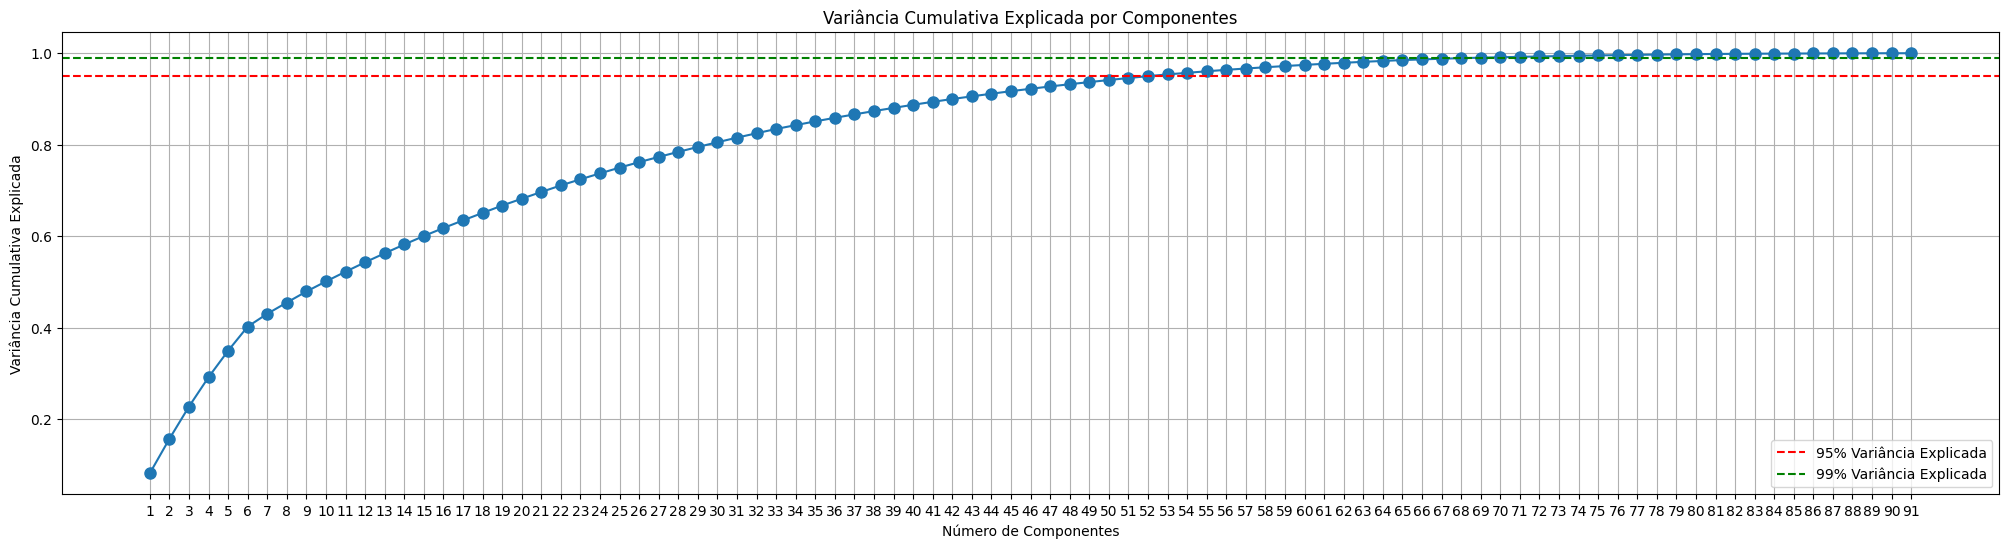

In [ ]:
# Calculando a variância cumulativa.
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plotando a variância cumulativa.
plt.figure(figsize=(25, 6))
plt.plot(range(1, len(cumulative_variance_ratio)+1), cumulative_variance_ratio, 'o-', markersize=8)
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Cumulativa Explicada')
plt.title('Variância Cumulativa Explicada por Componentes')
plt.xticks(range(1, len(cumulative_variance_ratio)+1))
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variância Explicada')
plt.axhline(y=0.99, color='g', linestyle='--', label='99% Variância Explicada')
plt.legend(loc='best')

plt.show()

**A partir do 58º componente já superarmos 95% da variância explicada, sendo assim iremos manter 58 componentes.**

In [ ]:
# Aplicando o PCA para selecionar variáveis.
pca = PCA(n_components=58)
pca.fit(X)

# Extraindo as cargas e criando um DataFrame.
loadings = pca.components_
loading_df = pd.DataFrame(loadings, columns=features, index=['PC'+str(i) for i in range(1, loadings.shape[0]+1)])
loading_df_transposed = loading_df.transpose()
loading_df_transposed

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58
IDADE,-0.005229,-0.022522,0.015405,0.018602,-0.006526,0.006166,0.046916,0.045523,-0.033696,0.058220,...,-0.103384,0.086659,-0.034741,-0.062130,0.039347,-0.054470,-0.015931,0.040480,0.017454,-0.000328
QT_DIAS_DESDE_INSCR,0.003624,-0.018958,-0.011785,0.023470,0.009787,-0.000553,0.038385,-0.003387,0.016845,-0.001917,...,-0.001249,0.028168,0.070616,0.000981,0.089467,0.046713,0.029323,-0.006151,-0.030820,0.044277
FL_USOU_SUPORTE,0.000062,0.003464,-0.012455,-0.011244,-0.016869,0.013331,0.039903,-0.037353,-0.042749,0.106939,...,-0.003477,0.052315,0.013915,0.020213,0.013766,-0.006107,0.011942,0.043430,0.011298,-0.056631
UTL_DATA_COMPRA,-0.230119,-0.038959,0.108325,0.075344,-0.106968,-0.033615,0.023147,-0.071190,-0.011975,0.063500,...,0.016432,-0.187248,0.037629,0.045360,-0.073433,0.027621,0.069073,0.019975,0.057631,0.029464
DIAS_DESDE_ULT_TRANS,0.230921,0.031883,-0.104008,-0.073655,0.127424,0.037087,-0.009688,0.075202,0.011759,-0.065722,...,0.012162,0.132481,-0.004448,-0.037888,-0.064043,0.003023,0.005929,0.015773,0.012333,-0.019628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CATEG_FAVORITA_Eletrônicos,0.000370,0.016702,-0.074086,0.108115,-0.027696,0.013160,0.327716,0.103870,-0.028743,-0.040343,...,0.018187,-0.104578,-0.118743,-0.000886,0.033739,-0.075374,0.142310,-0.163015,-0.044631,0.015383
CATEG_FAVORITA_Esportes,-0.009736,0.114850,0.037459,-0.049944,-0.066789,-0.000925,-0.122534,-0.244380,-0.052613,-0.138064,...,0.178963,0.109537,-0.083599,0.005393,0.018824,0.054036,-0.021071,-0.107642,-0.184640,0.029864
CATEG_FAVORITA_Livros,0.000207,-0.096239,-0.026904,-0.089395,-0.069301,-0.021662,-0.111230,0.208820,-0.186214,0.121813,...,0.052314,0.164781,0.026591,0.117126,-0.056926,-0.035847,0.078673,0.053242,-0.041796,-0.055995
CATEG_FAVORITA_Roupas,0.009591,0.004626,0.019530,0.043193,0.161786,-0.088338,-0.120345,0.008557,0.236555,-0.008531,...,0.027495,-0.136050,-0.068346,0.146819,-0.088983,-0.203594,0.138376,0.058597,0.193719,0.061999


**Checando as variáveis com maior valor absoluto de cada componente.**

In [ ]:
# Por exemplo, vamos pegar a primeira variável de maior loading absoluto para cada componente.
x = 1

# Identificando as 'x' variáveis de maior loading absoluto para cada componente.
top_loadings = {}

for component in loading_df_transposed.columns:
    sorted_loadings = loading_df_transposed[component].abs().sort_values(ascending=False)
    top_loadings[component] = sorted_loadings.index[:x].tolist()

# Gerando uma lista única de variáveis de top loadings de todos os componentes.
unique_top_loadings = list(set([item for sublist in top_loadings.values() for item in sublist]))

top_loadings

{'PC1': ['VL_TOT_GASTO'],
 'PC2': ['VL_TOT_U6M_CONS_ESPORTES'],
 'PC3': ['VL_MED_U6M_CONS_ELETRONICOS'],
 'PC4': ['VL_MED_U9M_CONS_LIVROS'],
 'PC5': ['VL_MED_U9M_CONS_ROUPAS'],
 'PC6': ['VL_MED_U9M_CONS_ALIMENTOS'],
 'PC7': ['CATEG_FAVORITA_Eletrônicos'],
 'PC8': ['VL_RAZ_TOT_U6M_U9M_CONS_LIV'],
 'PC9': ['VL_RAZ_TOT_U6M_U9M_CONS_ROU'],
 'PC10': ['VL_RAZ_TOT_U3M_U6M_CONS_ELE'],
 'PC11': ['VL_RAZ_TOT_U6M_U9M_CONS_ALI'],
 'PC12': ['VL_RAZ_TOT_U6M_U9M_CONS_ELE'],
 'PC13': ['VL_RAZ_TOT_U3M_U6M_CONS_LIV'],
 'PC14': ['VL_RAZ_TOT_U3M_U6M_CONS_LIV'],
 'PC15': ['PLANO_Básico'],
 'PC16': ['VL_RAZ_TOT_U6M_U9M_CONS_ESP'],
 'PC17': ['VL_RAZ_TOT_U6M_U9M_CONS_ROU'],
 'PC18': ['VL_RAZ_MED_U6M_U9M_CONS_ROU'],
 'PC19': ['VL_RAZ_TOT_U6M_U9M_CONS_ALI'],
 'PC20': ['VL_RAZ_MED_U6M_U9M_CONS_ALI'],
 'PC21': ['PLANO_Básico'],
 'PC22': ['NM_GENERO_M'],
 'PC23': ['IDADE'],
 'PC24': ['CATEG_FAVORITA_Eletrônicos'],
 'PC25': ['VL_RAZ_TOT_U9M_U12M_CONS_ROU'],
 'PC26': ['FL_USOU_SUPORTE'],
 'PC27': ['VL_RAZ_TOT_U9M_U1

**Checando as variáveis únicas da lista anterior.**

In [ ]:
# Contar o número de variáveis únicas.
count_unique_top_loadings = len(unique_top_loadings)

# Imprimindo a quantidade de variáveis únicas.
print('Número de variáveis únicas:', count_unique_top_loadings)
print('')

# Selecionando somente as variáveis únicas da lista de top_loadings.
unique_top_loadings

Número de variáveis únicas: 39



['VL_RAZ_TOT_U6M_U9M_CONS_LIV',
 'VL_RAZ_MED_U6M_U9M_CONS_ALI',
 'CATEG_FAVORITA_Eletrônicos',
 'IDADE',
 'VL_MED_U9M_CONS_ROUPAS',
 'VL_MED_U9M_CONS_ALIMENTOS',
 'VL_TOT_U3M_CONS_ELETRONICOS',
 'VL_MED_GASTO_LIVROS',
 'VL_RAZ_MED_U9M_U12M_CONS_ELE',
 'VL_TOT_GASTO',
 'VL_RAZ_MED_U6M_U9M_CONS_ROU',
 'FL_USOU_SUPORTE',
 'VL_MED_U3M_CONS_LIVROS',
 'VL_MED_GASTO_ALIMENTOS',
 'VL_TOT_U6M_CONS_ESPORTES',
 'VL_RAZ_MED_U9M_U12M_CONS_LIV',
 'VL_MED_GASTO_ELETRONICOS',
 'VL_RAZ_TOT_U3M_U6M_CONS_ELE',
 'VL_RAZ_TOT_U6M_U9M_CONS_ESP',
 'VL_RAZ_TOT_U6M_U9M_CONS_ELE',
 'VL_RAZ_TOT_U6M_U9M_CONS_ROU',
 'VL_RAZ_TOT_U9M_U12M_CONS_ELE',
 'VL_MED_U9M_CONS_LIVROS',
 'VL_RAZ_TOT_U9M_U12M_CONS_ROU',
 'VL_MED_U6M_CONS_ELETRONICOS',
 'VL_RAZ_MED_U6M_U9M_CONS_ESP',
 'VL_MED_U3M_CONS_ELETRONICOS',
 'VL_RAZ_TOT_U3M_U6M_CONS_LIV',
 'VL_TOT_U3M_CONS_ESPORTES',
 'VL_MED_GASTO_ESPORTES',
 'VL_MIN_GASTO',
 'VL_MED_U3M_CONS_ESPORTES',
 'VL_RAZ_MED_U9M_U12M_CONS_ROU',
 'PLANO_Básico',
 'VL_RAZ_MED_U6M_U9M_CONS_ELE',
 'Q

In [ ]:
# Mantendo somente as variáveis selecionadas na ABT.
abt_churn_02 = abt_churn_02[unique_top_loadings]

abt_churn_02.shape

(700, 39)

In [ ]:
abt_churn_02.head()

,VL_RAZ_TOT_U6M_U9M_CONS_LIV,VL_RAZ_MED_U6M_U9M_CONS_ALI,CATEG_FAVORITA_Eletrônicos,IDADE,VL_MED_U9M_CONS_ROUPAS,VL_MED_U9M_CONS_ALIMENTOS,VL_TOT_U3M_CONS_ELETRONICOS,VL_MED_GASTO_LIVROS,VL_RAZ_MED_U9M_U12M_CONS_ELE,VL_TOT_GASTO,...,VL_MED_GASTO_ESPORTES,VL_MIN_GASTO,VL_MED_U3M_CONS_ESPORTES,VL_RAZ_MED_U9M_U12M_CONS_ROU,PLANO_Básico,VL_RAZ_MED_U6M_U9M_CONS_ELE,QT_DIAS_DESDE_INSCR,VL_RAZ_MED_U3M_U6M_CONS_LIV,VL_RAZ_TOT_U6M_U9M_CONS_ALI,NM_GENERO_M
0,6.936320e-01,0.00000,1.898753,1.583371,0.000000,0.000000,3.572165e-16,1.125758e+00,-0.050721,-1.245930,...,3.789065e-16,3.586516,4.782906e-16,-1.681573e-15,-0.699544,1.235805e-01,0.135225,1.722314e-01,0.000000,-1.017292
1,-1.698218e-15,-0.00205,-0.526661,0.785320,-1.537086,2.334269,3.572165e-16,-3.889749e-16,-0.050721,-0.060821,...,-2.245567e+00,-0.627463,4.782906e-16,-6.930967e-02,-0.699544,1.235805e-01,1.646397,1.227625e-15,0.541076,-1.017292
2,-1.698218e-15,0.00000,-0.526661,1.250849,0.000000,0.000000,4.675951e-01,-1.099559e+00,-0.456066,0.808657,...,-6.388440e-01,-0.491992,-2.131798e+00,-1.681573e-15,1.429503,1.235805e-01,1.537903,1.227625e-15,0.000000,-1.017292
3,-1.698218e-15,0.00000,1.898753,1.317354,-0.548565,0.000000,3.268286e-01,-3.889749e-16,-0.050721,-1.030785,...,3.789065e-16,0.933108,4.782906e-16,-6.930967e-02,-0.699544,-4.149803e-01,1.477843,1.227625e-15,0.000000,0.983002
4,6.936320e-01,0.00000,-0.526661,-0.212243,-1.671871,0.000000,3.572165e-16,-1.648164e-01,0.000000,-1.144778,...,3.789065e-16,-0.706618,4.782906e-16,-6.930967e-02,-0.699544,8.541752e-16,-0.891597,1.722314e-01,0.000000,-1.017292


<br>

### **Eliminação de Features por Correlação de Pearson**

A correlação de Pearson mede a relação linear entre duas variáveis. Se duas variáveis têm uma alta correlação (próxima de 1 ou -1), isso significa que uma pode ser prevista a partir da outra com um alto grau de precisão.

Neste caso podemos retirar da tabela uma das variáveis de alta correlação.

In [ ]:
# Fazendo um cópia do DataFrame.
abt_churn_03 = abt_churn_00.copy()

# Criando uma função para remoção de características altamente correlacionadas de um DataFrame.
def remove_highly_correlated_features(df, threshold=0.9):
    # Calcula a matriz de correlação.
    corr_matrix = df.corr().abs()

    # Seleciona o triângulo superior da matriz de correlação.
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Identifica as colunas a serem removidas com base no limiar.
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

    # Remove as colunas.
    df_reduced = df.drop(columns=to_drop)

    return df_reduced, to_drop


df_reduced, dropped_features = remove_highly_correlated_features(abt_churn_03.drop(columns='CHURN'), threshold=0.9)

dropped_features

['DIAS_DESDE_ULT_TRANS', 'VL_TOT_GASTO', 'VL_MED_U12M_CONS_ESPORTES']

In [ ]:
df_reduced.head()

,IDADE,QT_DIAS_DESDE_INSCR,FL_USOU_SUPORTE,UTL_DATA_COMPRA,QTD_DIAS_DESDE_PRIM_COMPRA,QTD_COMPRAS_MES,VL_MED_GASTO,VL_MAX_GASTO,VL_MIN_GASTO,VL_TOT_GASTO_ALIMENTOS,...,VL_RAZ_TOT_U9M_U12M_CONS_ROU,VL_RAZ_MED_U6M_U9M_CONS_ROU,VL_RAZ_MED_U9M_U12M_CONS_ROU,PLANO_Básico,PLANO_Intermediário,CATEG_FAVORITA_Eletrônicos,CATEG_FAVORITA_Esportes,CATEG_FAVORITA_Livros,CATEG_FAVORITA_Roupas,NM_GENERO_M
0,1.583371,0.135225,-1.049811,-1.323513,-2.386224,-1.299335,2.150143,-0.548968,3.586516,-1.103242,...,8.082423e-16,-1.118994e-15,-1.681573e-15,-0.699544,1.367060,1.898753,-0.524448,-0.531085,-0.431788,-1.017292
1,0.785320,1.646397,0.952553,-1.185050,0.029952,0.243120,-0.875874,0.515401,-0.627463,1.222605,...,5.709052e-01,7.698724e-02,-6.930967e-02,-0.699544,1.367060,-0.526661,-0.524448,-0.531085,-0.431788,-1.017292
2,1.250849,1.537903,0.952553,1.191907,0.749980,1.699884,-1.045152,0.037201,-0.491992,0.207579,...,8.082423e-16,-1.118994e-15,-1.681573e-15,1.429503,-0.731497,-0.526661,1.906767,-0.531085,-0.431788,-1.017292
3,1.317354,1.477843,-1.049811,-1.219666,-2.159824,-0.699491,0.194473,-1.064490,0.933108,-1.103242,...,5.709052e-01,7.698724e-02,-6.930967e-02,-0.699544,1.367060,1.898753,-0.524448,-0.531085,-0.431788,0.983002
4,-0.212243,-0.891597,-1.049811,0.534205,0.052221,-1.127951,-0.535567,0.468414,-0.706618,-1.103242,...,5.709052e-01,-1.118994e-15,-6.930967e-02,-0.699544,-0.731497,-0.526661,-0.524448,1.882938,-0.431788,-1.017292


<br>

## **Métodos Supervisionados de Seleção de Variáveis**

### **Seleção de Variáveis por Feature Importance**

A importância das variáveis (ou "feature importance") é frequentemente derivada de modelos específicos, e a formulação matemática para calcular essa importância pode variar dependendo do modelo. Nos dá uma ideia de quais variáveis têm o maior impacto no modelo. Podemos usar 3 algoritmos para esse método (escolher qual dá o melhor resultado):

- **RandomForestClassifier**
- **GradientBoostingClassifier**
- **DecisionTreeClassifier**

Neste caso, para exemplificar, iremos utilizar o **RandomForestClassifier** por ser o mais rápido.

In [ ]:
# Fazendo um cópia do DataFrame.
abt_churn_04 = abt_churn_00.copy()

# Separando as variáveis explicativas da variável resposta (target).
X = abt_churn_04.drop(axis=1,columns='CHURN')
y = abt_churn_04.CHURN

# Treinando o modelo com algoritmo Random Forest.
clf = RandomForestClassifier()      # troque aqui qual classificador quer utilizar: GradientBoostingClassifier, DecisionTreeClassifier...
clf.fit(X, y)

# Obtendo a importância das variáveis.
feature_importances = clf.feature_importances_
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Ordenando as variáveis por importância.
features = features.sort_values(by='Importance', ascending=False)

# Estabelecendo um limite de corte, por exemplo, x% da importância máxima.
cutoff_maximp = 0.6
cutoff = cutoff_maximp * feature_importances.max()

# Selecionando variáveis acima do corte.
selected_features = X.columns[feature_importances > cutoff].tolist()

# Filtrando o DataFrame para apenas as features acima do corte.
selected_features_df = features[features['Importance'] > cutoff]

# Contar o número de variáveis selecionadas.
count_selected_features = len(selected_features_df)

# Imprimindo a quantidade de variáveis selecionadas.
print('Número de variáveis selecionadas:', count_selected_features)
print('')

selected_features_df

Número de variáveis selecionadas: 21



,Feature,Importance
8,VL_MED_GASTO,0.027472
18,VL_MED_GASTO_LIVROS,0.024638
1,QT_DIAS_DESDE_INSCR,0.024615
11,VL_TOT_GASTO_ALIMENTOS,0.023318
0,IDADE,0.022963
10,VL_MIN_GASTO,0.022936
12,VL_MED_GASTO_ALIMENTOS,0.022568
14,VL_MED_GASTO_ELETRONICOS,0.022112
4,DIAS_DESDE_ULT_TRANS,0.020326
5,QTD_DIAS_DESDE_PRIM_COMPRA,0.020314


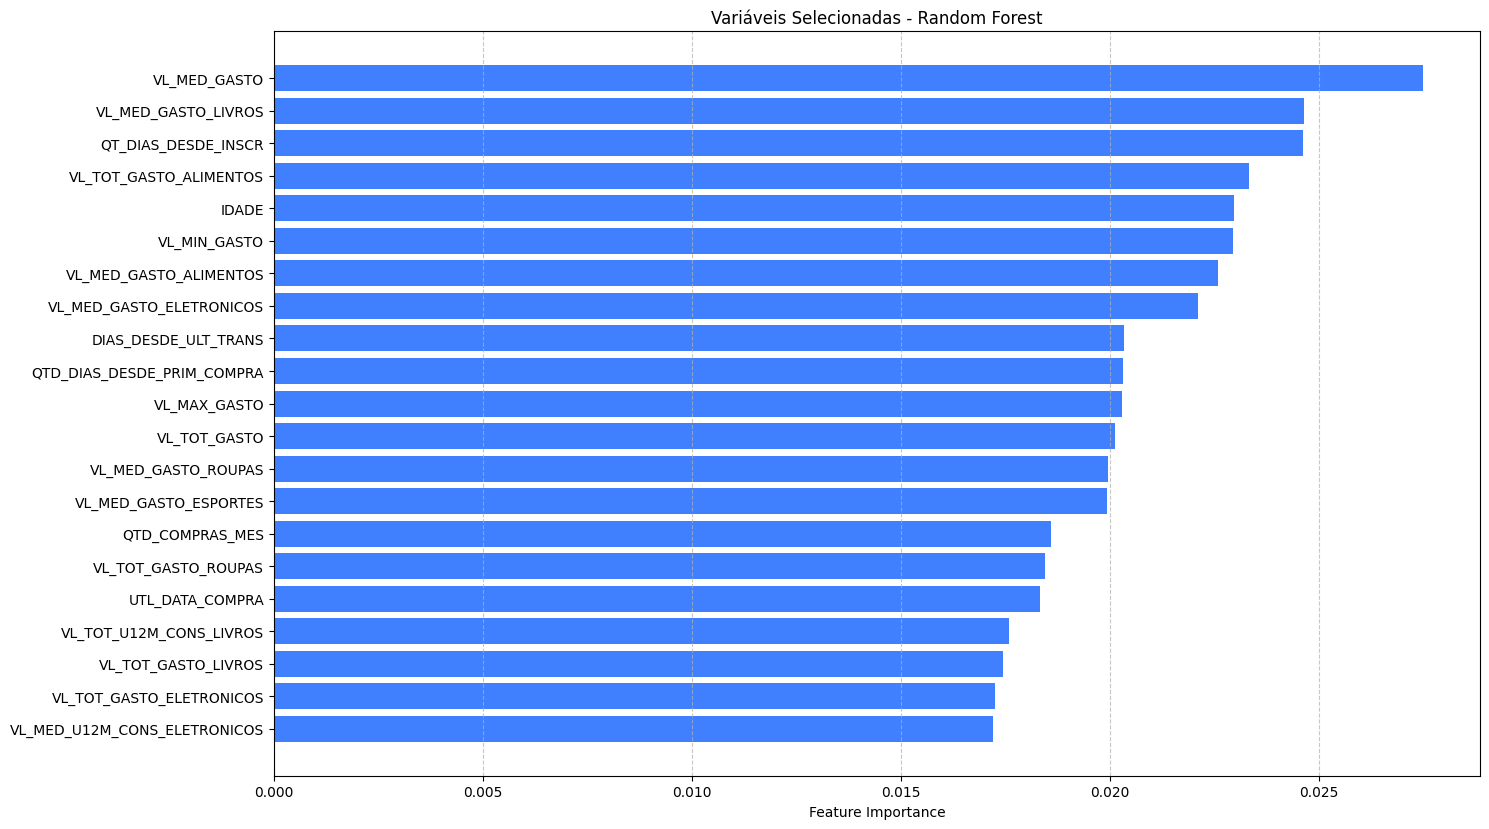

In [ ]:
# Ordenando as variáveis por importância.
features = features.sort_values(by='Importance', ascending=True)

# Filtrando o DataFrame para apenas as features acima do corte.
selected_features_df = features[features['Importance'] > cutoff]

# Visualizando a importância das variáveis em barras horizontais.
plt.figure(figsize=(15, len(selected_features_df)*0.4))
plt.barh(selected_features_df['Feature'], selected_features_df['Importance'], color=(0.25, 0.5, 1))
plt.xlabel('Feature Importance')
plt.title('Variáveis Selecionadas - Random Forest')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Mantendo somente as variáveis selecionadas na ABT.
abt_churn_04 = abt_churn_00[selected_features + ['CHURN']]

abt_churn_04.shape

(700, 22)

In [ ]:
abt_churn_04.head()

,IDADE,QT_DIAS_DESDE_INSCR,UTL_DATA_COMPRA,DIAS_DESDE_ULT_TRANS,QTD_DIAS_DESDE_PRIM_COMPRA,QTD_COMPRAS_MES,VL_TOT_GASTO,VL_MED_GASTO,VL_MAX_GASTO,VL_MIN_GASTO,...,VL_TOT_GASTO_ELETRONICOS,VL_MED_GASTO_ELETRONICOS,VL_MED_GASTO_ESPORTES,VL_TOT_GASTO_LIVROS,VL_MED_GASTO_LIVROS,VL_TOT_GASTO_ROUPAS,VL_MED_GASTO_ROUPAS,VL_MED_U12M_CONS_ELETRONICOS,VL_TOT_U12M_CONS_LIVROS,CHURN
0,1.583371,0.135225,-1.323513,0.723643,-2.386224,-1.299335,-1.245930,2.150143,-0.548968,3.586516,...,-0.274144,1.480010,3.789065e-16,-0.344227,1.125758e+00,-1.077717,0.000000,1.446349,-0.262014,0
1,0.785320,1.646397,-1.185050,0.588833,0.029952,0.243120,-0.060821,-0.875874,0.515401,-0.627463,...,1.070670,-0.496258,-2.245567e+00,-1.078002,-3.889749e-16,-0.302960,-1.455036,-0.479477,0.000000,0
2,1.250849,1.537903,1.191907,-0.797010,0.749980,1.699884,0.808657,-1.045152,0.037201,-0.491992,...,0.913537,-0.154002,-6.388440e-01,-0.100505,-1.099559e+00,0.185384,0.337790,-0.905665,0.000000,0
3,1.317354,1.477843,-1.219666,0.621187,-2.159824,-0.699491,-1.030785,0.194473,-1.064490,0.933108,...,0.308416,0.846578,3.789065e-16,-1.078002,-3.889749e-16,-0.158933,-0.488958,0.807197,0.000000,1
4,-0.212243,-0.891597,0.534205,-0.478859,0.052221,-1.127951,-1.144778,-0.535567,0.468414,-0.706618,...,-0.451981,0.611406,3.789065e-16,-0.083695,-1.648164e-01,-0.846890,-1.586761,0.000000,0.273929,1


<br>

### **Seleção de variáveis via Boruta**

O Boruta é um algoritmo de seleção de variáveis baseado em Random Forest. O objetivo do Boruta é encontrar e reter apenas as variáveis verdadeiramente importantes no conjunto de dados, enquanto remove aquelas que são apenas ruído.<br><br>

**O algoritmo funciona da seguinte forma:**

1. **Duplicação e embaralhamento**: Para cada variável no conjunto de dados original, uma duplicata é criada e embaralhada. Estas são chamadas de variáveis "sombra".

2. **Treinamento (Random Forest)**: Um modelo de floresta aleatória é treinado no conjunto de dados, que agora inclui as variáveis originais e suas sombras.

3. **Comparação de Importância**: A importância das variáveis originais é comparada com a importância das variáveis sombra. A ideia é que qualquer variável original que tenha importância significativamente maior do que a mais importante variável sombra é considerada relevante.

4. **Iteração**: O processo é repetido várias vezes, com as variáveis menos importantes sendo removidas em cada iteração, até que se tenha uma decisão clara sobre a relevância de cada variável.

In [ ]:
# Instalando o Boruta.
!pip install boruta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.2 MB/s eta 0:00:00


In [ ]:
# Importando a classe 'BorutaPy' da biblioteca Boruta.
from boruta import BorutaPy

# Fazendo um cópia do DataFrame.
abt_churn_05 = abt_churn_00.copy()

# Define o modelo - Random Forest.
rf = RandomForestClassifier()

# Define o método Boruta.
feat_selector = BorutaPy(
                         rf,
                         n_estimators='auto',
                         perc=60,
                         verbose=0,
                         random_state=1)

X = abt_churn_05.drop(axis=1,columns='CHURN')
y = abt_churn_05.CHURN

# Executa o Boruta.
feat_selector.fit(X.values, y)

# Obtém as variáveis selecionadas.
selected_features_boruta = X.columns[feat_selector.support_].tolist()

# Contar o número de variáveis selecionadas.
count_selected_features_boruta = len(selected_features_boruta)

# Imprimindo a quantidade de variáveis selecionadas.
print('Número de variáveis selecionadas:', count_selected_features_boruta)
print('')

selected_features_boruta

Número de variáveis selecionadas: 13



['IDADE',
 'QT_DIAS_DESDE_INSCR',
 'UTL_DATA_COMPRA',
 'QTD_DIAS_DESDE_PRIM_COMPRA',
 'VL_MED_GASTO',
 'VL_MIN_GASTO',
 'VL_TOT_GASTO_ALIMENTOS',
 'VL_MED_GASTO_ALIMENTOS',
 'VL_TOT_GASTO_ELETRONICOS',
 'VL_MED_GASTO_ELETRONICOS',
 'VL_MED_GASTO_ESPORTES',
 'VL_MED_GASTO_LIVROS',
 'VL_MED_GASTO_ROUPAS']

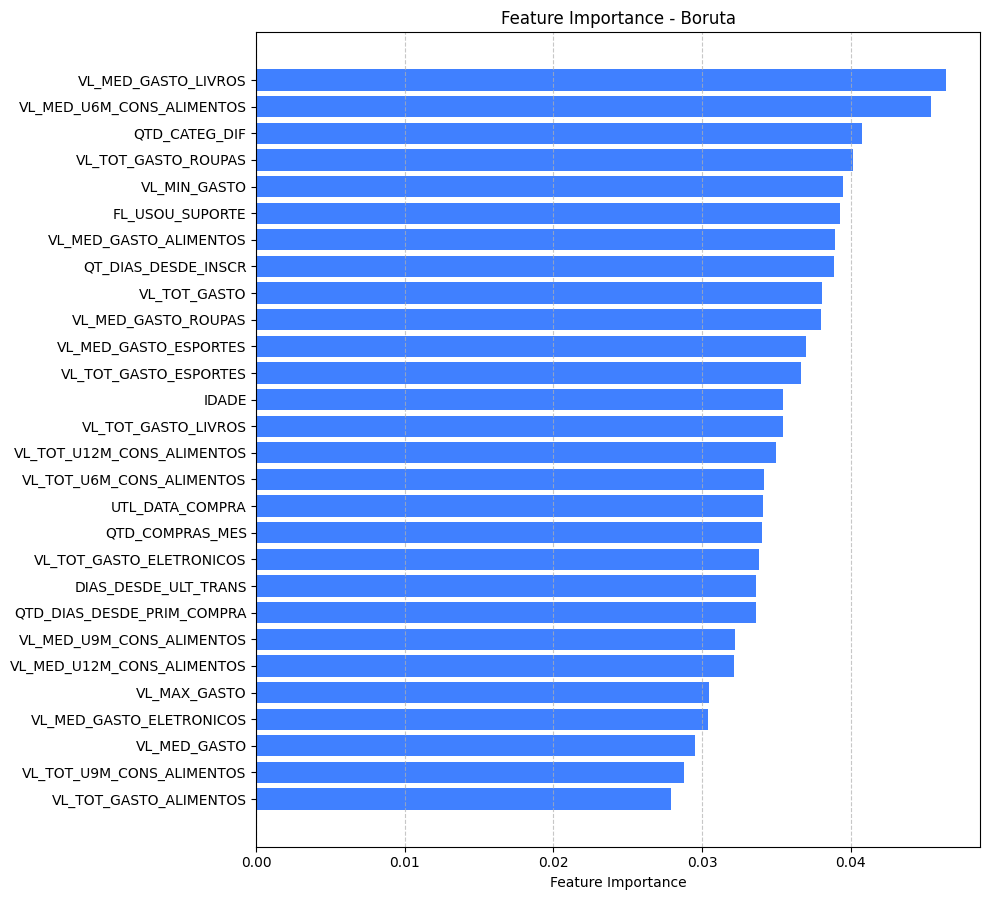

In [ ]:
# Supondo que 'feat_selector' é a nossa instância BorutaPy e 'X' é o nosso DataFrame de características.
importances = rf.feature_importances_
features = X.columns

# Ordena as variáveis pela importância.
sorted_idx = importances.argsort()

# Visualiza a importância das variáveis em barras horizontais.
plt.figure(figsize=(10, len(selected_features_boruta)*0.7))
plt.barh(features[sorted_idx], importances[sorted_idx], color=(0.25, 0.5, 1))
plt.xlabel('Feature Importance')
plt.title('Feature Importance - Boruta')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Mantendo somente as variáveis selecionadas na ABT.
abt_churn_05 = abt_churn_00[selected_features_boruta + ['CHURN']]

abt_churn_05.shape

(700, 14)

In [ ]:
abt_churn_05.head()

,IDADE,QT_DIAS_DESDE_INSCR,UTL_DATA_COMPRA,QTD_DIAS_DESDE_PRIM_COMPRA,VL_MED_GASTO,VL_MIN_GASTO,VL_TOT_GASTO_ALIMENTOS,VL_MED_GASTO_ALIMENTOS,VL_TOT_GASTO_ELETRONICOS,VL_MED_GASTO_ELETRONICOS,VL_MED_GASTO_ESPORTES,VL_MED_GASTO_LIVROS,VL_MED_GASTO_ROUPAS,CHURN
0,1.583371,0.135225,-1.323513,-2.386224,2.150143,3.586516,-1.103242,3.859226e-16,-0.274144,1.480010,3.789065e-16,1.125758e+00,0.000000,0
1,0.785320,1.646397,-1.185050,0.029952,-0.875874,-0.627463,1.222605,1.088852e+00,1.070670,-0.496258,-2.245567e+00,-3.889749e-16,-1.455036,0
2,1.250849,1.537903,1.191907,0.749980,-1.045152,-0.491992,0.207579,-1.173588e+00,0.913537,-0.154002,-6.388440e-01,-1.099559e+00,0.337790,0
3,1.317354,1.477843,-1.219666,-2.159824,0.194473,0.933108,-1.103242,3.859226e-16,0.308416,0.846578,3.789065e-16,-3.889749e-16,-0.488958,1
4,-0.212243,-0.891597,0.534205,0.052221,-0.535567,-0.706618,-1.103242,3.859226e-16,-0.451981,0.611406,3.789065e-16,-1.648164e-01,-1.586761,1


<br>

### **Seleção de Variáveis por RFE**

A Eliminação Recursiva de Variáveis (RFE) é uma técnica que seleciona variáveis de forma iterativa, treinando um modelo várias vezes. Em cada iteração, a variável considerada a "menos importante" é removida, reduzindo assim a dimensão do conjunto de dados.<br><br>

**O algoritmo funciona da seguinte forma:**

1. Treine o modelo com todas as variáveis.

2. Avalie a importância de cada variável. Isso é geralmente feito com base em coeficientes (para modelos lineares) ou importância de variáveis (para modelos baseados em árvores).

3. Remova a variável menos importante.

4. Repita os passos 1-3 até que o número desejado de variáveis seja atingido ou até que se cumpra algum outro critério.<br><br>

**Pontos relevantes a considerar sobre o RFE:**

- **Modelo Base:** O modelo base usado no RFE deve ser escolhido com cuidado. Nem todos os modelos são adequados para todas as situações.

- **Custo Computacional:** O RFE pode ser computacionalmente caro, especialmente com um grande número de variáveis, pois requer treinar o modelo várias vezes.

In [ ]:
# Fazendo um cópia do DataFrame.
abt_churn_06 = abt_churn_00.copy()

# Instanciando o modelo com o algoritmo escolhido.
model = DecisionTreeClassifier()    # troque aqui qual classificador quer utilizar: LogisticRegression, RandomForestClassifier, GradientBoostingClassifier...

# Definindo o número de variáveis que será selecionada (10) e separando as variáveis explicativas da variável resposta.
n_vars_keep = 10
X = abt_churn_06.drop(axis=1,columns='CHURN')
y = abt_churn_06.CHURN

# Instanciando o RFE.
rfe = RFE(estimator=model, n_features_to_select=n_vars_keep)
fit = rfe.fit(X, y)

selected_features_rfe = list(X.columns[fit.support_])

# Contar o número de variáveis selecionadas.
count_selected_features_rfe = len(selected_features_rfe)

# Imprimindo a quantidade de variáveis selecionadas.
print('Número de variáveis selecionadas:', count_selected_features_rfe)
print('')

selected_features_rfe

Número de variáveis selecionadas: 10



['IDADE',
 'QT_DIAS_DESDE_INSCR',
 'QTD_COMPRAS_MES',
 'VL_MAX_GASTO',
 'VL_MIN_GASTO',
 'VL_TOT_GASTO_ALIMENTOS',
 'VL_MED_GASTO_LIVROS',
 'VL_MED_GASTO_ROUPAS',
 'VL_TOT_U6M_CONS_ELETRONICOS',
 'VL_TOT_U9M_CONS_ELETRONICOS']

In [ ]:
# Mantendo somente as variáveis selecionadas na ABT.
abt_churn_06 = abt_churn_00[selected_features_rfe + ['CHURN']]

abt_churn_06.shape

(700, 11)

In [ ]:
abt_churn_06.head()

,IDADE,QT_DIAS_DESDE_INSCR,QTD_COMPRAS_MES,VL_MAX_GASTO,VL_MIN_GASTO,VL_TOT_GASTO_ALIMENTOS,VL_MED_GASTO_LIVROS,VL_MED_GASTO_ROUPAS,VL_TOT_U6M_CONS_ELETRONICOS,VL_TOT_U9M_CONS_ELETRONICOS,CHURN
0,1.583371,0.135225,-1.299335,-0.548968,3.586516,-1.103242,1.125758e+00,0.000000,6.896973e-01,0.246723,0
1,0.785320,1.646397,0.243120,0.515401,-0.627463,1.222605,-3.889749e-16,-1.455036,-7.438370e-01,-0.880668,0
2,1.250849,1.537903,1.699884,0.037201,-0.491992,0.207579,-1.099559e+00,0.337790,1.484948e-01,-0.178901,0
3,1.317354,1.477843,-0.699491,-1.064490,0.933108,-1.103242,-3.889749e-16,-0.488958,3.943631e-02,1.927471,1
4,-0.212243,-0.891597,-1.127951,0.468414,-0.706618,-1.103242,-1.648164e-01,-1.586761,2.767524e-16,0.000000,1


<br>

### **Seleção de Variáveis por Information Value (Target Binário)**

O Valor de Informação (Information Value - IV) é uma métrica frequentemente usada em modelagem de crédito e outros domínios para avaliar a força preditiva de uma variável categórica em relação a uma variável alvo binária. Ele quantifica o quanto a presença (ou ausência) de uma categoria em particular de uma variável é útil para prever o resultado.
<br><br>

**Interpretação do IV:**

A força preditiva de uma variável com base no seu IV pode ser interpretada da seguinte forma:

- Muito fraco: IV < 0.02

- Fraco: 0.02 <= IV < 0.1

- Moderado: 0.1 <= IV < 0.3

- Forte: 0.3 <= IV < 0.5

- Muito forte: IV >= 0.5<br><br>

**Considerações:**

- O IV é uma métrica univariada, o que significa que avalia a relação entre uma variável individual e a variável alvo, sem levar em consideração outras variáveis.

- O IV é mais apropriado para variáveis categóricas. Se você tem variáveis contínuas, elas devem ser discretizadas (por exemplo, em intervalos) antes de calcular o IV.

- Enquanto o IV fornece uma medida útil da força preditiva de uma variável, é importante também considerar outras informações e o contexto ao decidir incluir ou excluir uma variável de um modelo.

In [ ]:
# Esta função recebe um DataFrame (df) e um número de "bins" como argumentos. Ela faz uma cópia do DataFrame original e itera sobre as colunas, verificando se uma coluna é numérica e tem mais categorias únicas do que bins.
# Se atender a essas condições, a coluna é discretizada usando a função "pd.cut" e os rótulos são substituídos por seus índices numéricos. O DataFrame discretizado é retornado.
def discretize_numeric_features(df, bins):
    df_discretized = df.copy()
    for col in df.columns:
        if df[col].dtype in ['float64', 'float32', 'int64', 'int32'] and len(df[col].unique()) > bins:
            df_discretized[col] = pd.cut(df[col], bins=bins, labels=False, duplicates='drop')
    return df_discretized


# Esta função calcula o Valor da Informação (IV) para uma característica específica. Itera sobre os valores únicos da característica e calcula as contagens para cada categoria, incluindo a contagem total, a contagem de eventos positivos (Good) e a contagem de eventos negativos (Bad).
# Com essas informações, ela calcula a Distribuição Good (Distr_Good), a Distribuição Bad (Distr_Bad), o Peso de Informação (WoE), e finalmente, o IV. O resultado é a soma dos IVs para todas as categorias únicas da característica.
def calculate_iv(df, feature, target):
    lst = []
    for value in df[feature].unique():
        lst.append({
            'Value': value,
            'All': df[df[feature] == value].count()[feature],
            'Good': df[(df[feature] == value) & (df[target] == 1)].count()[feature],
            'Bad': df[(df[feature] == value) & (df[target] == 0)].count()[feature]
        })

    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = (dset['Good'] + 0.0001) / (dset['Good'].sum() + 0.0001)  # Adicionando um valor pequeno para evitar a divisão por zero.
    dset['Distr_Bad'] = (dset['Bad'] + 0.0001) / (dset['Bad'].sum() + 0.0001)  # Adicionando um valor pequeno para evitar a divisão por zero.
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad']).replace({np.inf: 0, -np.inf: 0})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    return dset['IV'].sum()


# Esta função classifica o IV em categorias como "Muito Fraco", "Fraco", "Moderado", "Forte" e "Muito Forte", com base em valores de corte específicos.
def classify_iv(iv_value):
    if iv_value < 0.02:
        return "Muito Fraco"
    elif iv_value < 0.1:
        return "Fraco"
    elif iv_value < 0.3:
        return "Moderado"
    elif iv_value < 0.5:
        return "Forte"
    else:
        return "Muito Forte"


# Esta função realiza uma seleção de características com base no Valor da Informação (IV), incluindo uma barra de progresso para acompanhar o processo.
# def select_features_by_iv_with_progress(df, target, iv_cutoff_ratio=1.0):
#     from tqdm import tqdm
#     iv_stats = []
#     for col in tqdm(df.columns, desc="Calculating IV", unit="variable"):
#         if col != target:
#             iv_value = calculate_iv(df, col, target)
#             iv_stats.append({
#                 'Variable': col,
#                 'IV': iv_value,
#                 'Predictiveness': classify_iv(iv_value)
#             })

#     iv_df = pd.DataFrame(iv_stats).sort_values(by='IV', ascending=False)
#     max_iv = iv_df['IV'].max()
#     cutoff_value = iv_cutoff_ratio * max_iv
#     selected_features = iv_df[iv_df['IV'] >= cutoff_value]['Variable'].tolist()

#     return selected_features, iv_df


# Esta função utiliza as funções anteriores para selecionar características com base no IV. Primeiro, ela discretiza características numéricas chamando a função "discretize_numeric_features". Em seguida, calcula o IV para cada característica usando a função "calculate_iv".
# Os resultados são armazenados em um DataFrame, classificados por IV. As características são selecionadas com base em um valor de corte determinado pelo percentual (iv_cutoff_ratio) do maior IV. As características selecionadas e o DataFrame de IVs são retornados.
def select_features_by_iv_discretized(df, target, iv_cutoff_ratio=1.0, bins=10):
    from tqdm import tqdm
    df = discretize_numeric_features(df, bins)

    iv_stats = []
    for col in tqdm(df.columns, desc="Calculating IV", unit="variable"):
        if col != target:
            iv_value = calculate_iv(df, col, target)
            iv_stats.append({
                'Variable': col,
                'IV': iv_value,
                'Predictiveness': classify_iv(iv_value)
            })

    iv_df = pd.DataFrame(iv_stats).sort_values(by='IV', ascending=False)
    max_iv = iv_df['IV'].max()
    cutoff_value = iv_cutoff_ratio * max_iv
    selected_features = iv_df[iv_df['IV'] >= cutoff_value]['Variable'].tolist()

    return selected_features, iv_df

In [ ]:
# Fazendo um cópia do DataFrame.
abt_churn_07 = abt_churn_00.copy()

# Testando a função.
selected_vars_iv, iv_data = select_features_by_iv_discretized(abt_churn_07, 'CHURN', iv_cutoff_ratio=0.25, bins=10)

# Contar o número de variáveis selecionadas.
count_selected_vars_iv = len(selected_vars_iv)

# Imprimindo a quantidade de variáveis selecionadas.
print('\n')
print('\nNúmero de variáveis selecionadas:', count_selected_vars_iv)
print('')

selected_vars_iv

Calculating IV: 100%|██████████| 92/92 [00:10<00:00,  8.93variable/s]




Número de variáveis selecionadas: 26



['VL_RAZ_TOT_U3M_U6M_CONS_ELE',
 'VL_RAZ_MED_U9M_U12M_CONS_ESP',
 'VL_RAZ_MED_U9M_U12M_CONS_LIV',
 'VL_RAZ_TOT_U9M_U12M_CONS_ALI',
 'VL_RAZ_TOT_U9M_U12M_CONS_ESP',
 'VL_TOT_U3M_CONS_ESPORTES',
 'VL_RAZ_MED_U3M_U6M_CONS_ELE',
 'VL_TOT_U3M_CONS_LIVROS',
 'VL_RAZ_MED_U3M_U6M_CONS_LIV',
 'VL_TOT_U6M_CONS_ESPORTES',
 'VL_RAZ_MED_U9M_U12M_CONS_ELE',
 'VL_TOT_U9M_CONS_ESPORTES',
 'VL_RAZ_MED_U6M_U9M_CONS_LIV',
 'VL_RAZ_TOT_U6M_U9M_CONS_ALI',
 'VL_TOT_U6M_CONS_ELETRONICOS',
 'VL_RAZ_TOT_U9M_U12M_CONS_LIV',
 'VL_RAZ_TOT_U3M_U6M_CONS_LIV',
 'VL_RAZ_TOT_U6M_U9M_CONS_ESP',
 'VL_RAZ_MED_U9M_U12M_CONS_ROU',
 'VL_TOT_U9M_CONS_ELETRONICOS',
 'VL_RAZ_MED_U9M_U12M_CONS_ALI',
 'VL_TOT_U12M_CONS_ESPORTES',
 'VL_RAZ_TOT_U6M_U9M_CONS_LIV',
 'VL_RAZ_MED_U6M_U9M_CONS_ALI',
 'VL_TOT_U12M_CONS_ALIMENTOS',
 'VL_TOT_GASTO_ELETRONICOS']

In [ ]:
pd.set_option('display.max_rows', None)
iv_data

,Variable,IV,Predictiveness
62,VL_RAZ_TOT_U3M_U6M_CONS_ELE,4.809892e-01,Forte
73,VL_RAZ_MED_U9M_U12M_CONS_ESP,3.750196e-01,Forte
79,VL_RAZ_MED_U9M_U12M_CONS_LIV,3.254954e-01,Forte
59,VL_RAZ_TOT_U9M_U12M_CONS_ALI,2.990064e-01,Moderado
70,VL_RAZ_TOT_U9M_U12M_CONS_ESP,2.861833e-01,Moderado
36,VL_TOT_U3M_CONS_ESPORTES,2.764749e-01,Moderado
65,VL_RAZ_MED_U3M_U6M_CONS_ELE,2.511741e-01,Moderado
44,VL_TOT_U3M_CONS_LIVROS,2.449764e-01,Moderado
77,VL_RAZ_MED_U3M_U6M_CONS_LIV,2.427948e-01,Moderado
37,VL_TOT_U6M_CONS_ESPORTES,1.887047e-01,Moderado


In [ ]:
pd.reset_option('display.max_rows')

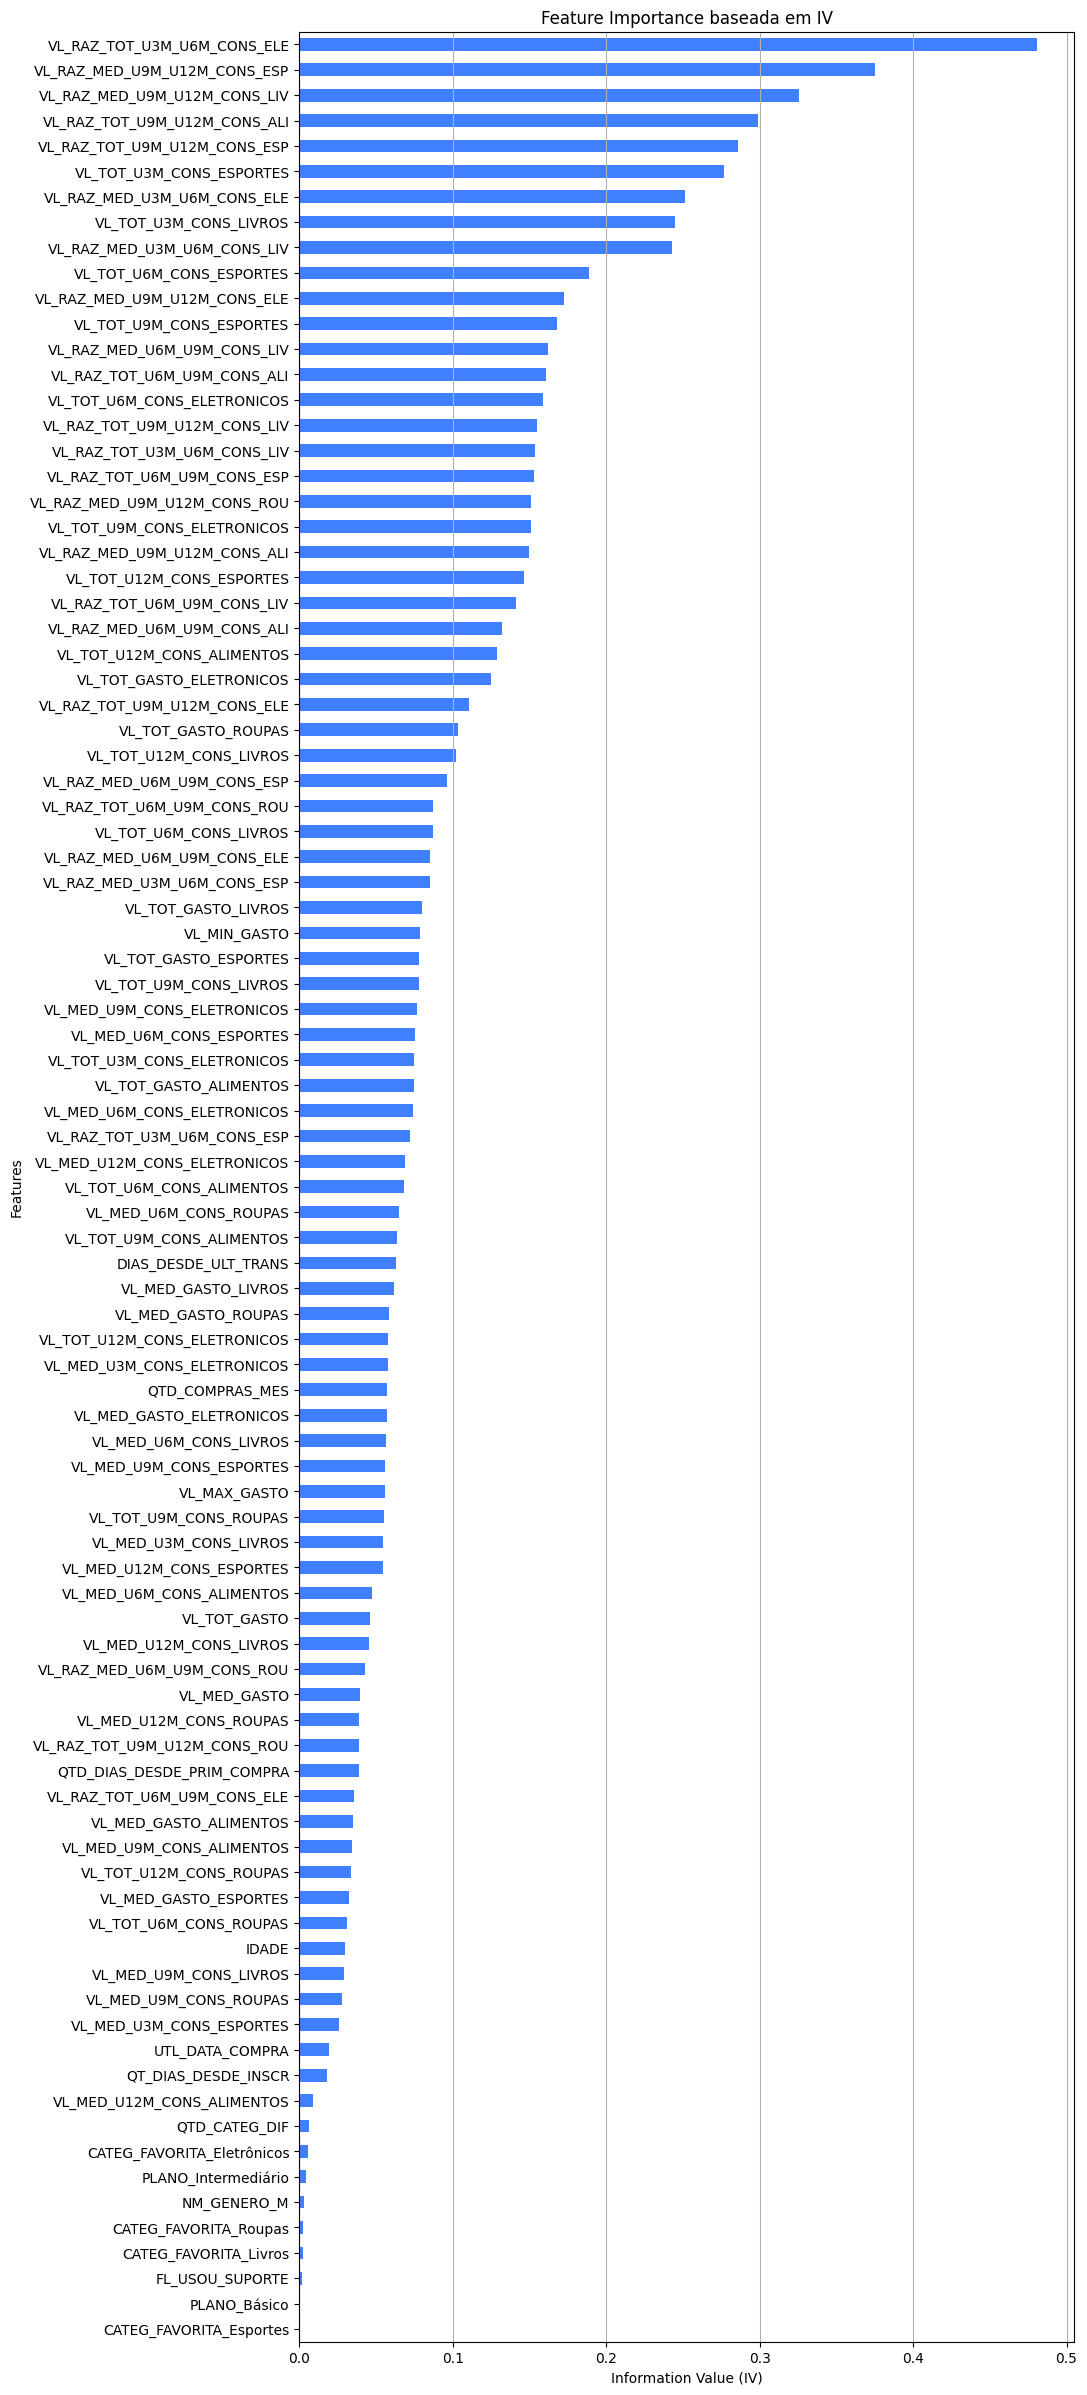

In [ ]:
# Plotando o resultado em um gráfico.

def plot_iv(df_iv_data):
    plt.figure(figsize=(10, 30))
    df_iv_data.sort_values('IV').set_index('Variable')['IV'].plot(kind='barh', color=(0.25, 0.5, 1))
    plt.xlabel('Information Value (IV)')
    plt.ylabel('Features')
    plt.title('Feature Importance baseada em IV')
    plt.grid(axis='x')
    plt.show()

plot_iv(iv_data)

In [ ]:
# Mantendo somente as variáveis selecionadas na ABT.
abt_churn_07 = abt_churn_00[selected_vars_iv + ['CHURN']]

abt_churn_07.shape

(700, 27)

In [ ]:
abt_churn_07.head()

,VL_RAZ_TOT_U3M_U6M_CONS_ELE,VL_RAZ_MED_U9M_U12M_CONS_ESP,VL_RAZ_MED_U9M_U12M_CONS_LIV,VL_RAZ_TOT_U9M_U12M_CONS_ALI,VL_RAZ_TOT_U9M_U12M_CONS_ESP,VL_TOT_U3M_CONS_ESPORTES,VL_RAZ_MED_U3M_U6M_CONS_ELE,VL_TOT_U3M_CONS_LIVROS,VL_RAZ_MED_U3M_U6M_CONS_LIV,VL_TOT_U6M_CONS_ESPORTES,...,VL_RAZ_TOT_U6M_U9M_CONS_ESP,VL_RAZ_MED_U9M_U12M_CONS_ROU,VL_TOT_U9M_CONS_ELETRONICOS,VL_RAZ_MED_U9M_U12M_CONS_ALI,VL_TOT_U12M_CONS_ESPORTES,VL_RAZ_TOT_U6M_U9M_CONS_LIV,VL_RAZ_MED_U6M_U9M_CONS_ALI,VL_TOT_U12M_CONS_ALIMENTOS,VL_TOT_GASTO_ELETRONICOS,CHURN
0,-1.143966e-15,0.000000,1.253187e-02,0.00000,-8.542327e-16,-6.799262e-16,0.000000,5.531660e-01,1.722314e-01,5.145716e-16,...,-9.925494e-16,-1.681573e-15,0.246723,1.643191e-15,-3.820537e-16,6.936320e-01,0.00000,0.000000,-0.274144,0
1,-1.143966e-15,0.000000,-8.829515e-16,0.51353,-8.542327e-16,-6.799262e-16,0.000000,-3.200886e-16,1.227625e-15,5.145716e-16,...,-9.925494e-16,-6.930967e-02,-0.880668,-3.493972e-02,-1.821042e+00,-1.698218e-15,-0.00205,0.531725,1.070670,0
2,5.203484e-01,0.038486,-8.829515e-16,0.00000,5.152083e-01,-1.898061e+00,0.073768,-3.200886e-16,1.227625e-15,-1.775041e+00,...,5.381699e-01,-1.681573e-15,-0.178901,1.643191e-15,-1.567654e+00,-1.698218e-15,0.00000,0.000000,0.913537,0
3,5.203484e-01,0.000000,-8.829515e-16,0.00000,-8.542327e-16,-6.799262e-16,0.073768,-3.200886e-16,1.227625e-15,5.145716e-16,...,-9.925494e-16,-6.930967e-02,1.927471,1.643191e-15,-3.820537e-16,-1.698218e-15,0.00000,0.000000,0.308416,1
4,-1.143966e-15,0.000000,1.253187e-02,0.00000,-8.542327e-16,-6.799262e-16,0.000000,1.519681e+00,1.722314e-01,5.145716e-16,...,-9.925494e-16,-6.930967e-02,0.000000,1.643191e-15,-3.820537e-16,6.936320e-01,0.00000,0.000000,-0.451981,1


<br>

## **Definição do método escolhido**

- Para este caso iremos ficar com o método de **Feature Importance**, treinando com o **RandomForestClassifier**, para a seleção das nossas variáveis.

In [ ]:
# Fazendo um cópia do DataFrame.
abt_churn_08 = abt_churn_00.copy()

# Separando as variáveis explicativas da variável resposta (target).
X = abt_churn_08.drop(axis=1,columns='CHURN')
y = abt_churn_08.CHURN

# Treinando o modelo com algoritmo Random Forest.
clf = RandomForestClassifier()      # troque aqui qual classificador quer utilizar: GradientBoostingClassifier, DecisionTreeClassifier...
clf.fit(X, y)

# Obtendo a importância das variáveis.
feature_importances = clf.feature_importances_
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Ordenando as variáveis por importância.
features = features.sort_values(by='Importance', ascending=False)

# Estabelecendo um limite de corte, por exemplo, x% da importância máxima.
cutoff_maximp = 0.6
cutoff = cutoff_maximp * feature_importances.max()

# Selecionando variáveis acima do corte.
selected_features = X.columns[feature_importances > cutoff].tolist()

# Filtrando o DataFrame para apenas as features acima do corte.
selected_features_df = features[features['Importance'] > cutoff]

# Contar o número de variáveis selecionadas.
count_selected_features = len(selected_features_df)

# Imprimindo a quantidade de variáveis selecionadas.
print('Número de variáveis selecionadas:', count_selected_features)
print('')

selected_features_df

Número de variáveis selecionadas: 20



,Feature,Importance
8,VL_MED_GASTO,0.028156
1,QT_DIAS_DESDE_INSCR,0.024316
9,VL_MAX_GASTO,0.023578
10,VL_MIN_GASTO,0.023411
18,VL_MED_GASTO_LIVROS,0.023288
0,IDADE,0.022279
20,VL_MED_GASTO_ROUPAS,0.022010
11,VL_TOT_GASTO_ALIMENTOS,0.021986
14,VL_MED_GASTO_ELETRONICOS,0.021530
13,VL_TOT_GASTO_ELETRONICOS,0.020658


In [ ]:
# Salvando a lista de variáveis selecionadas em um arquivo .pkl.
with open('/content/drive/MyDrive/artefatos/prd_list_features.pkl', 'wb') as f:
    pickle.dump(selected_features, f)

In [ ]:
# Carregando a lista do arquivo .pkl.
with open('/content/drive/MyDrive/artefatos/prd_list_features.pkl', 'rb') as f:
    loaded_lista = pickle.load(f)

print(loaded_lista)

['IDADE', 'QT_DIAS_DESDE_INSCR', 'UTL_DATA_COMPRA', 'DIAS_DESDE_ULT_TRANS', 'QTD_DIAS_DESDE_PRIM_COMPRA', 'QTD_COMPRAS_MES', 'VL_TOT_GASTO', 'VL_MED_GASTO', 'VL_MAX_GASTO', 'VL_MIN_GASTO', 'VL_TOT_GASTO_ALIMENTOS', 'VL_MED_GASTO_ALIMENTOS', 'VL_TOT_GASTO_ELETRONICOS', 'VL_MED_GASTO_ELETRONICOS', 'VL_MED_GASTO_ESPORTES', 'VL_TOT_GASTO_LIVROS', 'VL_MED_GASTO_LIVROS', 'VL_MED_GASTO_ROUPAS', 'VL_TOT_U9M_CONS_ESPORTES', 'VL_TOT_U12M_CONS_LIVROS']


In [ ]:
# Incluindo a variável target na lista de variáveis selecionadas.
lista_features = loaded_lista + ['CHURN']
abt_churn_train = abt_churn_00[lista_features]

abt_churn_train.shape

(700, 21)

In [ ]:
abt_churn_train.head()

,IDADE,QT_DIAS_DESDE_INSCR,UTL_DATA_COMPRA,DIAS_DESDE_ULT_TRANS,QTD_DIAS_DESDE_PRIM_COMPRA,QTD_COMPRAS_MES,VL_TOT_GASTO,VL_MED_GASTO,VL_MAX_GASTO,VL_MIN_GASTO,...,VL_MED_GASTO_ALIMENTOS,VL_TOT_GASTO_ELETRONICOS,VL_MED_GASTO_ELETRONICOS,VL_MED_GASTO_ESPORTES,VL_TOT_GASTO_LIVROS,VL_MED_GASTO_LIVROS,VL_MED_GASTO_ROUPAS,VL_TOT_U9M_CONS_ESPORTES,VL_TOT_U12M_CONS_LIVROS,CHURN
0,1.583371,0.135225,-1.323513,0.723643,-2.386224,-1.299335,-1.245930,2.150143,-0.548968,3.586516,...,3.859226e-16,-0.274144,1.480010,3.789065e-16,-0.344227,1.125758e+00,0.000000,0.000000,-0.262014,0
1,0.785320,1.646397,-1.185050,0.588833,0.029952,0.243120,-0.060821,-0.875874,0.515401,-0.627463,...,1.088852e+00,1.070670,-0.496258,-2.245567e+00,-1.078002,-3.889749e-16,-1.455036,0.000000,0.000000,0
2,1.250849,1.537903,1.191907,-0.797010,0.749980,1.699884,0.808657,-1.045152,0.037201,-0.491992,...,-1.173588e+00,0.913537,-0.154002,-6.388440e-01,-0.100505,-1.099559e+00,0.337790,-1.661458,0.000000,0
3,1.317354,1.477843,-1.219666,0.621187,-2.159824,-0.699491,-1.030785,0.194473,-1.064490,0.933108,...,3.859226e-16,0.308416,0.846578,3.789065e-16,-1.078002,-3.889749e-16,-0.488958,0.000000,0.000000,1
4,-0.212243,-0.891597,0.534205,-0.478859,0.052221,-1.127951,-1.144778,-0.535567,0.468414,-0.706618,...,3.859226e-16,-0.451981,0.611406,3.789065e-16,-0.083695,-1.648164e-01,-1.586761,0.000000,0.273929,1


<br>

## **Leitura dos dados de teste e aplicação das variáveis selecionadas**

In [ ]:
# Lendo a tabela de teste.
abt_churn_test = pd.read_csv('/content/drive/MyDrive/abt_churn_tratada_test.csv')

# Dropando as colunas 'Unnamed: 0' e 'ID_CLIENTE'.
abt_churn_test.drop(axis=1,columns=['Unnamed: 0','ID_CLIENTE'],inplace=True)

abt_churn_test.shape

(300, 92)

In [ ]:
# Incluindo a variável target na lista de variáveis selecionadas.
abt_churn_test = abt_churn_test[lista_features]

abt_churn_test.shape

(300, 21)

In [ ]:
abt_churn_test.head()

,IDADE,QT_DIAS_DESDE_INSCR,UTL_DATA_COMPRA,DIAS_DESDE_ULT_TRANS,QTD_DIAS_DESDE_PRIM_COMPRA,QTD_COMPRAS_MES,VL_TOT_GASTO,VL_MED_GASTO,VL_MAX_GASTO,VL_MIN_GASTO,...,VL_MED_GASTO_ALIMENTOS,VL_TOT_GASTO_ELETRONICOS,VL_MED_GASTO_ELETRONICOS,VL_MED_GASTO_ESPORTES,VL_TOT_GASTO_LIVROS,VL_MED_GASTO_LIVROS,VL_MED_GASTO_ROUPAS,VL_TOT_U9M_CONS_ESPORTES,VL_TOT_U12M_CONS_LIVROS,CHURN
0,-0.212243,-0.405310,-0.296576,-0.052861,0.430792,1.185732,0.967182,-0.397783,0.541060,-0.710998,...,1.524825e-01,0.857214,0.580292,-1.105716e+00,-0.178032,-1.649456e+00,1.318534,0.000000,-0.975689,1
1,1.250849,-1.308138,1.145753,-0.775440,1.032052,1.100040,1.142593,-0.133148,0.762998,-0.491992,...,1.173581e+00,0.212490,-0.469292,-2.514281e-01,0.254113,7.565141e-01,-1.938754,0.000000,-0.121377,0
2,0.053773,-1.155083,1.214984,-0.807795,0.783383,1.100040,0.844395,-0.336545,-0.444664,-0.642793,...,-1.122805e+00,-0.329937,-1.352416,6.049931e-01,1.203108,2.339889e-01,1.420927,-1.192940,-0.399278,0
3,0.386295,-0.219319,0.430358,-0.430328,-2.983773,-1.299335,-1.710354,-3.079993,-4.739795,0.039252,...,3.859226e-16,-0.941747,-1.780754,3.789065e-16,-1.078002,-3.889749e-16,0.000000,0.000000,0.000000,1
4,-0.012731,-0.060452,0.857287,-0.640631,0.323159,1.100040,0.754956,-0.211008,0.472080,-0.782644,...,2.391129e-01,0.718236,0.353937,-7.217665e-01,0.411677,-1.681010e-01,-0.372714,-1.501601,-2.006233,1


<br>

## **Salvar as tabelas de treino e teste pós Feature Selection**

In [ ]:
abt_churn_train.to_csv('/content/drive/MyDrive/abt_churn_train_fs01.csv')
abt_churn_test.to_csv('/content/drive/MyDrive/abt_churn_test_fs01.csv')